## Final Project Submission

Please fill out:
* Student name: ANTONY NJOROGE
* Student pace: Part time
* Scheduled project review date/time: 29th April 2025 
* Instructor name: Sam G. Mwangi
* Blog post URL:


# Business Understanding: 
The company is expanding in to new industries to diversify its portfolio. Specifically, they are interested in purchasing and operating airplanes for commercial and private enterprises, but do not know anything about the potential risks of aircraft. 

Risk in aviation could relate to safety, maintenance costs, operational efficiency, regulatory compliance, or even market demand for certain types of aircraft.

## Objective: 
Determining which aircraft are the lowest risk for the company to start this new business endeavor.
Translate my findings into actionable insights that the head of the new aviation division can use to help decide which aircraft to purchase.

## Data Understanding
The dataset ['AviationData.csv'](https://www.kaggle.com/datasets/khsamaha/aviation-accident-database-synopses) is about accidents, not operational data. It contains data about Civil aviation accidents and selected incidents within the United States, its territories and possessions, and in international waters. 


## Setup

Import the relevant libraries, open up the `AviationData.csv` file as dataframe called `aviation_data`. 




In [1]:
# Import pandas and matplotlib
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file into a DataFrame
aviation_data = pd.read_csv('data\AviationData.csv', encoding='latin1')

# Display the various datatypes within the dataframe
aviation_data.info()


RuntimeError: module compiled against API version 0xe but this version of numpy is 0xd

<ipython-input-1-94beacd88b1b>:6: DtypeWarning: Columns (6,7,28) have mixed types. Specify dtype option on import or set low_memory=False.
  aviation_data = pd.read_csv('data\AviationData.csv', encoding='latin1')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50249 non-null  object 
 9   Airport.Name            52790 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87572 non-null  object 
 14  Make                    88826 non-null

### Step 1: Filter data by columns

 - Drop columns with over 50% missing values
 

In [2]:
# Drop columns with more than 50% missing values
columns_to_drop_1 = ['Latitude', 'Longitude', 'FAR.Description', 'Schedule', 'Air.carrier','Airport.Code', 'Airport.Name']
aviation_data = aviation_data.drop(columns=columns_to_drop_1)
aviation_data.isnull().sum()
aviation_data.shape

(88889, 24)

### Step 2: Data Cleaning

1. Removing rows with missing or irrelevant values in key columns like `Make`, `Model`, `Location`, `Total.Fatal.Injuries`, and `Aircraft.Category`.
2. Converting numeric columns (e.g., `Total.Fatal.Injuries`) to appropriate data types.

In [3]:
# Drop rows with missing values in 'Make' , 'Model' and 'Location columns
aviation_data.dropna(subset=['Make', 'Model', 'Location', 'Total.Fatal.Injuries', 'Aircraft.Category'], inplace=True)

# Strip whitespaces
aviation_data = aviation_data.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

# Convert Total.Fatal.Injuries to numeric
aviation_data["Total.Fatal.Injuries"] = pd.to_numeric(aviation_data["Total.Fatal.Injuries"], errors="coerce")

# Filter out rows with invalid or negative injury values
aviation_data = aviation_data[aviation_data["Total.Fatal.Injuries"] >= 0]
aviation_data.shape

(28538, 24)

### Step 4: Categorize data

 - Filter data to required private and commercial airplanes
 - Filter data by Airplane category

In [4]:
# Define the custom order for sorting
custom_order = ["Personal", "Business", "Ferry", "Executive/Corporate"]

# Sort the dataframe based on the custom order
private_and_commercial = aviation_data[aviation_data['Purpose.of.flight'].isin(custom_order)].copy()
private_and_commercial['Purpose.of.flight'] = pd.Categorical(private_and_commercial['Purpose.of.flight'], categories=custom_order, ordered=True)
private_and_commercial = private_and_commercial.sort_values('Purpose.of.flight')

private_and_commercial.shape

(16584, 24)

In [5]:
airplanes_data = private_and_commercial[private_and_commercial['Aircraft.Category'] == 'Airplane']

### Step 5: Analyze Risk by Aircraft Model
We will group the data by `Make` and `Model` to calculate:
- Fatality rate by `Make`
- Fatality rate by `Model`
- Low risk airplanes

In [6]:
X = 50

# Filter makes with at least X accidents
makes_with_min_accidents = airplanes_data.groupby('Make').filter(lambda x: len(x) >= X)

# Calculate fatality rate for each make
fatality_rates_by_make = makes_with_min_accidents.groupby('Make').agg(
    total_accidents=('Event.Id', 'count'),
    total_fatalities=('Total.Fatal.Injuries', 'sum')
)
fatality_rates_by_make['fatality_rate'] = fatality_rates_by_make['total_fatalities'] / fatality_rates_by_make['total_accidents']

# Sort by fatality rate in ascending order
lowest_fatality_rates_by_make = fatality_rates_by_make.sort_values('fatality_rate', ascending=True)

# lowest_fatality_rates_by_make

In [17]:
X = 50

# Filter models with at least X accidents
models_with_min_accidents = airplanes_data.groupby('Model').filter(lambda x: len(x) >= X)

# Calculate fatality rate for each model
fatality_rates = models_with_min_accidents.groupby('Model').agg(
    total_accidents=('Event.Id', 'count'),
    total_fatalities=('Total.Fatal.Injuries', 'sum')
)
fatality_rates['fatality_rate'] = fatality_rates['total_fatalities'] / fatality_rates['total_accidents']

# Sort by fatality rate in ascending order
lowest_fatality_rates = fatality_rates.sort_values('fatality_rate', ascending=True)

# lowest_fatality_rates.head()

In [18]:
# Group by Make and Model
risk_analysis = airplanes_data.groupby(["Make", "Model"]).agg(
    Total_Accidents=("Event.Id", "count"),
    Total_Fatalities=("Total.Fatal.Injuries", "sum"),
    Avg_Fatalities_Per_Accident=("Total.Fatal.Injuries", "mean")
).reset_index()

# Sort by Total_Fatalities to identify low-risk aircraft
low_risk_aircraft = risk_analysis.sort_values(by="Total_Fatalities", ascending=True)
low_risk_aircraft.value_counts()

Make               Model                 Total_Accidents  Total_Fatalities  Avg_Fatalities_Per_Accident
177MF LLC          PITTS MODEL 12        1                0.0               0.0                            1
PERTH AMBOY        BIRD CK               1                0.0               0.0                            1
PFOUTS ALFRED L    SENIOR AERO SPT D260  1                0.0               0.0                            1
PFLUGRADT          Kitfox                1                0.0               0.0                            1
PF CUB FLYERS LLC  CCK-2000              1                0.0               0.0                            1
                                                                                                          ..
DENNIS l ZUMBALT   SKY BOLT              1                0.0               0.0                            1
DENISAR RICHARD A  LANCAIR 320           1                0.0               0.0                            1
DEMPSEY DANIEL M   ZODIA

In [27]:
# Define a threshold for popularity (e.g., aircraft with more than 50 accidents)
popular_airplanes = popular_grouped[popular_grouped["Total_Accidents"] > 50]

# Group by Make and Model for popular aircraft
popular_grouped = airplanes_data.groupby(["Make", "Model"]).agg(
    Total_Accidents=("Event.Id", "count"),
    Total_Fatalities=("Total.Fatal.Injuries", "sum"),
    Avg_Fatalities_Per_Accident=("Total.Fatal.Injuries", "mean")
).reset_index()

# Sort by Total_Accidents in descending order
popular_airplanes = popular_grouped.sort_values(by="Total_Accidents", ascending=False)
popular_airplanes.head(10)

,Make,Model,Total_Accidents,Total_Fatalities,Avg_Fatalities_Per_Accident
962,CESSNA,172,234,57.0,0.243590
1438,Cessna,172,184,45.0,0.244565
1271,CIRRUS DESIGN CORP,SR22,118,72.0,0.610169
995,CESSNA,180,115,11.0,0.095652
1007,CESSNA,182,114,35.0,0.307018
437,BEECH,A36,113,85.0,0.752212
3780,PIPER,PA-18-150,111,5.0,0.045045
1476,Cessna,182,101,43.0,0.425743
3882,PIPER,PA28,100,43.0,0.430000
979,CESSNA,172N,94,32.0,0.340426


### Step 6: Visualization
1. Fatality risk by `Make`
2. Fatality risk by `Model`
3. Low risk airplanes

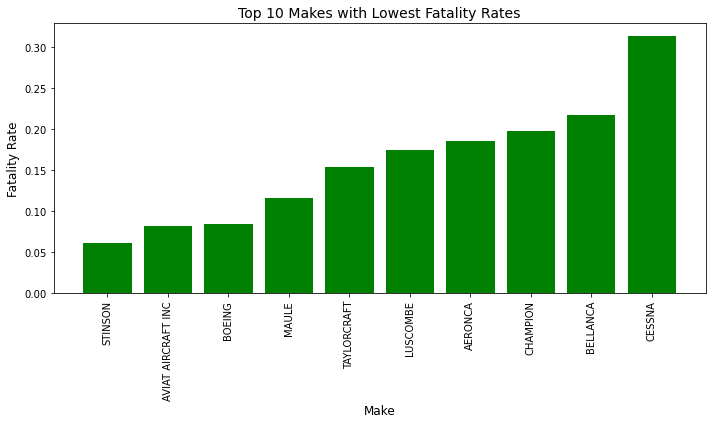

In [9]:
top_10_lowest_fatality_rates = lowest_fatality_rates_by_make.head(10)

# Plot the data
plt.figure(figsize=(10, 6))
plt.bar(top_10_lowest_fatality_rates.index, top_10_lowest_fatality_rates['fatality_rate'], color='green')
plt.xlabel('Make', fontsize=12)
plt.ylabel('Fatality Rate', fontsize=12)
plt.title('Top 10 Makes with Lowest Fatality Rates', fontsize=14)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

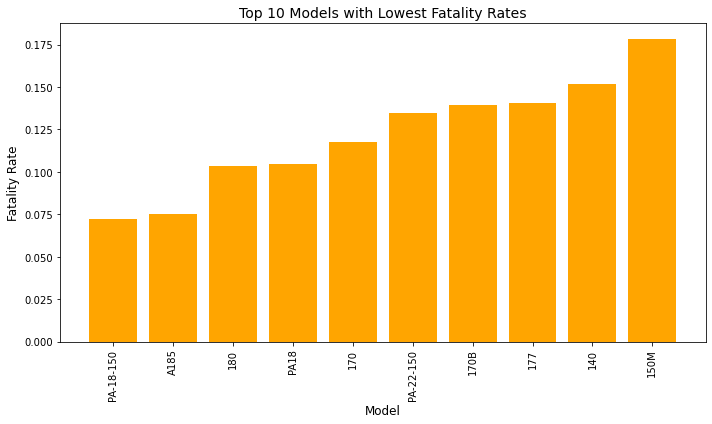

In [10]:
plt.figure(figsize=(10, 6))
plt.bar(lowest_fatality_rates.index[:10], lowest_fatality_rates['fatality_rate'][:10], color='orange')
plt.xlabel('Model', fontsize=12)
plt.ylabel('Fatality Rate', fontsize=12)
plt.title('Top 10 Models with Lowest Fatality Rates', fontsize=14)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

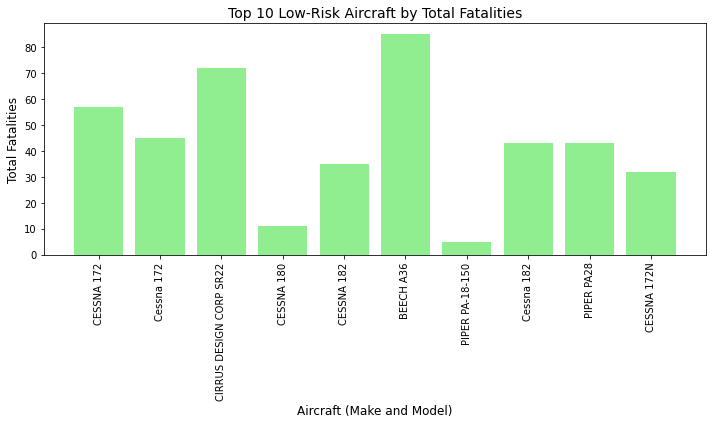

In [ ]:
# Select the top 10 low-risk popular aircraft 
top_10_low_risk_popular_aircraft = popular_airplanes.head(10)

# Plot the data
plt.figure(figsize=(10, 6))
plt.bar(top_10_low_risk_popular_aircraft['Make'] + " " + top_10_low_risk_popular_aircraft['Model'], 
    top_10_low_risk_popular_aircraft['Total_Fatalities'], color='lightgreen')
plt.xlabel('Aircraft (Make and Model)', fontsize=12)
plt.ylabel('Total Fatalities', fontsize=12)
plt.title('Top 10 Low-Risk Aircraft by Total Fatalities', fontsize=14)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

### Step 7: Actionable Insights
Based on the analysis, we can provide the following insights to the head of the aviation division:
1. **Focus on Aircraft with Low Fatality Rates**: Aircraft models with the lowest total fatalities and average fatalities per accident are the safest choices for the business.
2. **Consider Proven Manufacturers**: Aircraft from manufacturers with consistently low accident rates (e.g., Cessna, Piper) should be prioritized.
3. **Balance Safety and Business Needs**: While safety is paramount, consider operational costs, passenger capacity, and suitability for commercial/private use when selecting aircraft.